In [51]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Preprocessing

In [2]:
bank = pd.read_csv("bank.csv", delimiter=";")
bank_additional = pd.read_csv("bank-additional.csv", delimiter=";")
bank_additional_full = pd.read_csv("bank-additional-full.csv", delimiter=";")
bank_full = pd.read_csv("bank-full.csv", delimiter=";")

In [3]:
bank.shape

(4521, 17)

In [4]:
bank_additional.shape

(4119, 21)

In [5]:
bank_additional_full.shape

(41188, 21)

In [6]:
bank_full.shape

(45211, 17)

In [7]:
replace_dict = {"yes": 1, "no": 0}
bank.replace(replace_dict, inplace= True)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


## This counts as visualisation

<AxesSubplot:>

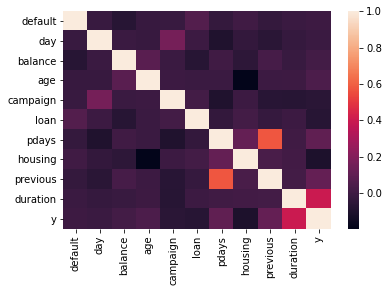

In [8]:
corrs = bank.corr()["y"].abs().sort_values()
corrmat = bank[corrs.index].corr()
sns.heatmap(corrmat)

In [9]:
bank_col = bank.columns

In [10]:
bank_additional_col = bank_additional.columns

In [11]:
bank_additional_full_col= bank_additional_full.columns

In [12]:
bank_full_col = bank_full.columns

In [13]:
columns = []
for col in bank_col: 
    if col in bank_additional_col:
        columns.append(col)
print (columns)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [14]:
def exclude_col (colList, df):
    df= df[colList]
    return df

In [15]:
bank_drop = exclude_col(columns, bank)
bank_additional_drop = exclude_col(columns, bank_additional)
bank_additional_full_drop = exclude_col(columns, bank_additional_full)
bank_full_drop = exclude_col(columns, bank_full)

In [16]:
bank_additional_drop.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,487,2,999,0,nonexistent,no
1,39,services,single,high.school,no,no,no,telephone,may,346,4,999,0,nonexistent,no
2,25,services,married,high.school,no,yes,no,telephone,jun,227,1,999,0,nonexistent,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,17,3,999,0,nonexistent,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,58,1,999,0,nonexistent,no


In [17]:
bank_drop.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,0,0,cellular,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,1,1,cellular,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1,0,cellular,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1,1,unknown,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,1,0,unknown,may,226,1,-1,0,unknown,0


In [18]:
replace_dict = {"yes": 1, "no": 0}
bank_additional_drop.replace(replace_dict, inplace= True)
bank_additional_drop.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,30,blue-collar,married,basic.9y,0,1,0,cellular,may,487,2,999,0,nonexistent,0
1,39,services,single,high.school,0,0,0,telephone,may,346,4,999,0,nonexistent,0
2,25,services,married,high.school,0,1,0,telephone,jun,227,1,999,0,nonexistent,0
3,38,services,married,basic.9y,0,unknown,unknown,telephone,jun,17,3,999,0,nonexistent,0
4,47,admin.,married,university.degree,0,1,0,cellular,nov,58,1,999,0,nonexistent,0


In [19]:
replace_dict = {"yes": 1, "no": 0}
bank_additional_full_drop.replace(replace_dict, inplace= True)
bank_additional_full_drop.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,261,1,999,0,nonexistent,0
1,57,services,married,high.school,unknown,0,0,telephone,may,149,1,999,0,nonexistent,0
2,37,services,married,high.school,0,1,0,telephone,may,226,1,999,0,nonexistent,0
3,40,admin.,married,basic.6y,0,0,0,telephone,may,151,1,999,0,nonexistent,0
4,56,services,married,high.school,0,0,1,telephone,may,307,1,999,0,nonexistent,0


In [20]:
replace_dict = {"yes": 1, "no": 0}
bank_full_drop.replace(replace_dict, inplace= True)
bank_full_drop.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,1,0,unknown,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,1,0,unknown,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,1,1,unknown,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1,0,unknown,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,0,0,unknown,may,198,1,-1,0,unknown,0


In [21]:
bank_drop.replace('unknown', np.NaN, inplace=True)
bank_additional_drop.replace('unknown', np.NaN, inplace=True)
bank_additional_full_drop.replace('unknown', np.NaN, inplace=True)
bank_full_drop.replace('unknown', np.NaN, inplace=True)

In [22]:
bank_additional_full_drop.shape

(41188, 15)

In [23]:
bank_combined= pd.concat([bank_drop, bank_additional_drop])


In [24]:
bank_combined= pd.concat([bank_combined, bank_additional_full_drop])

In [25]:
bank_combined= pd.concat([bank_combined, bank_full_drop])

In [26]:
bank_combined.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0.0,0.0,0.0,cellular,oct,79,1,-1,0,NaN,0
1,33,services,married,secondary,0.0,1.0,1.0,cellular,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0.0,1.0,0.0,cellular,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0.0,1.0,1.0,NaN,jun,199,4,-1,0,NaN,0
4,59,blue-collar,married,secondary,0.0,1.0,0.0,NaN,may,226,1,-1,0,NaN,0


In [27]:
bank_logistic = bank_combined.drop(["job", "marital", "education", "contact", "month", "poutcome"], axis =1)

In [28]:
bank_logistic = bank_logistic.dropna()

In [29]:
bank_logistic.head()

,age,default,housing,loan,duration,campaign,pdays,previous,y
0,30,0.0,0.0,0.0,79,1,-1,0,0
1,33,0.0,1.0,1.0,220,1,339,4,0
2,35,0.0,1.0,0.0,185,1,330,1,0
3,30,0.0,1.0,1.0,199,4,-1,0,0
4,59,0.0,1.0,0.0,226,1,-1,0,0


Logistic Regression

In [30]:
end= int(95039*0.8)
train = bank_logistic [:end]
test = bank_logistic [end:]

features = ['age', 'default', 'housing', 'loan', 'duration', 
            'campaign', 'pdays', 'previous', 'y']

In [31]:
lm = LogisticRegression()
lm.fit (train[features], train ['y'])
lm.predict_proba (test[features]) ##gives 0 or 1
lm.predict (test[features])

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

K Nearest Neighbor 

In [32]:
end= int(95039*0.8)
train = bank_logistic [:end]
test = bank_logistic [end:]

knn= KNeighborsRegressor()
knn.fit(train[features], train ['y'])

knn.predict(test[features])

array([0. , 0. , 0. , ..., 0.4, 0. , 0.2])

Support Vector Machine

In [33]:
clf = svm.SVC()
clf.fit (train[features], train['y'])
clf.predict (test[features])

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

Decision Tree

In [35]:
clf = DecisionTreeClassifier ()
clf.fit (train[features], train['y'])
clf.predict(test[features])

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

Random Forest 

In [41]:
clf = RandomForestClassifier (max_depth = 2, random_state = 0)
clf.fit (train[features], train['y'])
clf.predict(test[features])

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

Naive Bayes

In [43]:
clf=BernoulliNB()
clf.fit (train[features], train['y'])
clf.predict(test[features])

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

Confusion Matrix

In [52]:
X_train, X_test, y_train, y_test = train_test_split(bank_logistic[features], bank_logistic['y'], random_state=0)
classifier= svm.SVC (kernel='linear', C=0.01).fit (X_train, y_train)

## This counts as visualisation

array([[1., 0.],
       [0., 1.]])

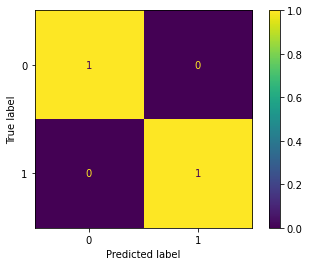

In [53]:
disp=plot_confusion_matrix (classifier, X_test, y_test, normalize = 'true')
disp.confusion_matrix